In [8]:
import sys
sys.path.append(r'./src/')

import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

from imbalancedXGBoost import ImbalancedXGBoost
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



The type of 'X' is:  <class 'numpy.ndarray'>
The length of 'X' is:  756
The shape of 'X' is:  (756, 754)
The type of the first 'X' entry is:  <class 'numpy.ndarray'>
The type of the first 'X[0]' entry is:  <class 'numpy.float64'>
'X':  [[-1.72519117  0.96874225  0.62764391 ... -0.775137   -0.81472704
  -0.36659507]
 [-1.72519117  0.96874225  0.12161952 ... -0.52664699 -0.58297219
   0.40039616]
 [-1.72519117  0.96874225  0.61795018 ... -0.75606253 -0.8043897
  -0.7809355 ]
 ...
 [ 1.72519117 -1.03226633  0.81336154 ... -0.71674252 -0.79017671
  -0.77287314]
 [ 1.72519117 -1.03226633  0.54105055 ... -0.77132466 -0.82631929
  -0.81173208]
 [ 1.72519117 -1.03226633  0.3945807  ... -0.68658105 -0.84098293
  -0.82811405]]
*******************************************
The type of 'y' is:  <class 'pandas.core.series.Series'>
The length of 'y' is:  756
The shape of 'y' is:  (756,)
The type of the first 'y' entry is:  <class 'numpy.int64'>
'y':  0      1
1      1
2      1
3      1
4      1
      

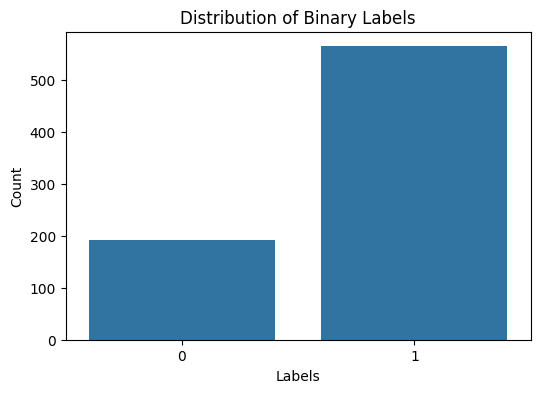

In [9]:
# Dataset is used in original paper
df = pd.read_csv("./../../440-project-data/parkinson/pd_speech_features.csv")

X = df.iloc[:,:754]
y = df['class']

S = StandardScaler()
X = S.fit_transform(X)

# Looking into the type, length, and shape of the data for a better understanding
# Explain X
print("The type of 'X' is: ", type(X))
print("The length of 'X' is: ", len(X))
print("The shape of 'X' is: ", X.shape)
print("The type of the first 'X' entry is: ", type(X[0]))
print("The type of the first 'X[0]' entry is: ", type(X[0][0]))
print("'X': ", X)
print("*******************************************")
# Explain y
print("The type of 'y' is: ", type(y))
print("The length of 'y' is: ", len(y))
print("The shape of 'y' is: ", y.shape)
print("The type of the first 'y' entry is: ", type(y[0]))
print("'y': ", y)

# Understanding how skewed the data is if at all
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Binary Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = xgb.XGBClassifier(n_estimators=10)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print(f'Basic Model Accuracy: \t{accuracy*100:.2f}%')
print(f'Basic Model Precision: \t{precision*100:.2f}%')
print(f'Basic Model Recall: \t{recall*100:.2f}%')
print(f'Basic Model F1: \t{f1*100:.2f}%')


Basic Model Accuracy: 	87.50%
Basic Model Precision: 	88.00%
Basic Model Recall: 	96.49%
Basic Model F1: 	92.05%


In [12]:
n_estimators = 10
max_depth = 10 
max_leaves = 0
eta_learning_rate = 0.1 
verbosity = 1
objective = 'binary:logistic' 
booster = 'gbtree'
gamma = 0.0
min_child_weight = 1.0
early_stopping_rounds = None
eval_metric = 'logloss'
l1_reg_alpha = 0.0
l2_reg_lambda = 1.0
focal_gamma = None
weighted_alpha = None

model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

model.fit(X_train, y_train)
predictions = model.predict(X_test, y_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print(f'My Basic Implementation Accuracy: \t{accuracy*100:.2f}%')
print(f'My Basic Implementation Precision: \t{precision*100:.2f}%')
print(f'My Basic Implementation Recall: \t{recall*100:.2f}%')
print(f'My Basic Implementation F1: \t{f1*100:.2f}%')

My Basic Implementation Accuracy: 	86.18%
My Basic Implementation Precision: 	85.50%
My Basic Implementation Recall: 	98.25%
My Basic Implementation F1: 	91.43%


In [13]:
n_estimators = 10
max_depth = 10 
max_leaves = 0
eta_learning_rate = 0.1 
verbosity = 1
objective = 'weighted' 
booster = 'gbtree'
gamma = 0.0
min_child_weight = 1.0
early_stopping_rounds = None
eval_metric = 'logloss'
l1_reg_alpha = 0.0
l2_reg_lambda = 1.0
focal_gamma = None
weighted_alpha = 0.4

model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

model.fit(X_train, y_train)
predictions = model.predict(X_test, y_test)
accuracy = accuracy_score(y_test, predictions)

print(f'Weighted Accuracy: \t{accuracy*100:.2f}%')

Weighted Accuracy: 	52.63%


In [14]:
n_estimators = 10
max_depth = 10 
max_leaves = 0
eta_learning_rate = 0.1 
verbosity = 1
objective = 'focal' 
booster = 'gbtree'
gamma = 0.0
min_child_weight = 1.0
early_stopping_rounds = None
eval_metric = 'logloss'
l1_reg_alpha = 0.0
l2_reg_lambda = 1.0
focal_gamma = 0.5
weighted_alpha = None

model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

model.fit(X_train, y_train)
predictions = model.predict(X_test, y_test)
accuracy = accuracy_score(y_test, predictions)

print(f'Focal Accuracy: \t{accuracy*100:.2f}%')

Focal Accuracy: 	78.29%
